In [52]:
import numpy as np
import matplotlib.pyplot as plt
import math
from graphviz import Digraph


In [53]:
class Value():
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0  # Initialize gradient

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        out.label = f"({self.label} + {other.label})"
        out.grad = self.grad + other.grad  # Update gradient
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        out.label = f"({self.label} * {other.label})"
        out.grad = self.grad * other.data + self.data * other.grad  # Update gradient
        return out
    
    def __sub__(self, other):
        out = Value(self.data - other.data, (self, other), '-')
        out.label = f"({self.label} - {other.label})"
        return out
        
    def sigmoid(self):
        out = Value(1 / (1 + math.exp(-self.data)), (self,), 'sigmoid')
        out.label = f"sigmoid({self.label})"
        out.grad = self.data * (1 - self.data)  # Update gradient
        return out
    
    def relu(self):
        out = Value(max(0, self.data), (self,), 'relu')
        out.label = f"relu({self.label})"
        out.grad
        return out
    


In [57]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot
    


Value(data=0.6038343579544894)


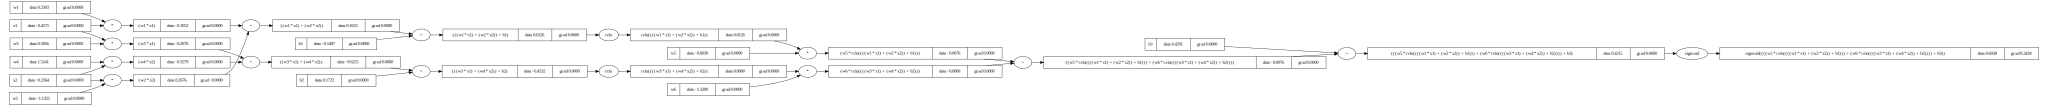

In [58]:
w1 = Value(np.random.randn(), label='w1')
w2 = Value(np.random.randn(), label='w2')
x1 = Value(np.random.randn(), label='x1')
x2 = Value(np.random.randn(), label='x2')
b1 = Value(np.random.randn(), label='b1')
w3 = Value(np.random.randn(), label='w3')
w4 = Value(np.random.randn(), label='w4')

b2 = Value(np.random.randn(), label='b2')
b3 = Value(np.random.randn(), label='b3')
a1 = w1 * x1 + w2 * x2 + b1
a2 = w3 * x1 + w4 * x2 + b2
a3 = a1.relu()
a4 = a2.relu()
w5 = Value(np.random.randn(), label='w5')
w6 = Value(np.random.randn(), label='w6')
a5 = w5 * a3 + w6 * a4 + b3
a6 = a5.sigmoid()  


print(a6)
draw_dot(a6)